# Pandas

O Pandas é uma ferramenta de manipulação de dados de alto nível, construída com base no pacote Numpy.

## Estruturas de Dados

### Series
São arrays unidimensionais capazes de armazenar qualquer tipo de dado. Os rótulos das linhas são os index.

```
s = pd.Series(dados, index = index)
```
O argumento *dados* pode ser um dicionário, uma lista, um array Numpy ou uma constante.

### DataFrames
É uma estrutura de dados tabular bidimensional com rótulos nas linhas e colunas. Como a Series, os DataFrames são capazes de armazenar qualquer tipo de dados.

```
df = pd.DataFrame(dados, index=index, columns=columns)
```
O argumento *dados* pode ser um dicionário, uma lista, um array Numpy, uma Series ou outro DataFrame.


# Importando a Base de Dados

Para iniciar um projeto em Python, precisamos importar os pacotes a serem utilizados. Neste caso, importaremos o Pandas. Na primeira célula do notebook, bastaria escrever import pandas. Contudo, a comunidade de usuários usa um apelido mais sucinto: ```as pd```. Todas as vezes que precisarmos evocar o Pandas usaremos essa terminologia.

In [ ]:
import pandas as pd

Existe um método no Pandas chamado ```read_csv()```,  para este método passaremos o caminho do arquivo que gostaríamos de ler.

Após execurtar teremos como primeiros resultados.

In [ ]:
dados = pd.read_csv('aluguel.csv')
dados.head()

Perceba que os separadores do arquivo não foram entendidos, logo, as informações na tabela aparecem aglutinadas em uma única coluna.

No caso de ```read_csv()```, notaremos a necessidade do argumento ```sep``` com default ```,```. Nosso arquivo utiliza como separador o caractere ```;```. Adicionando isso ao código, teremos como saída o documento na formatação correta 

In [ ]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

O método ```info()```, retorna ainda mais informações sobre o DataFrame.

In [ ]:
dados.info()

É mostrado o número de colunas, os tipos de variável, a quantidade de registros que não são nulos e a memória usada. 

Para poder gerar uma visualização agradável para consulta e um pouco mais sucinta, usa-se o método ```head()```, e serão exibidos apenas os cinco primeiros elementos da lista. 

In [ ]:
dados.head()

Pode-se ampliar o valor de linhas exibidas especificando a quantidade do parâmetro do método, por exemplo ```head(10)```, e serão exibidas as 10 primeiras linhas da tabela.

## Informações Gerais sobre a Base de Dados

O método ```dtypes()``` exibe apenas os tipos das variáveis.

In [ ]:
#Tipo de cada coluna do DataFrame
dados.dtypes

Uma maneira de exibir os resultados de forma mais apresentáveis pode-se criar um dataframe.

O DataFrame possui o parâmetro ```columns```, em pode-se especificar o nome das colunas.

E para alterar o nome da coluna do index atribui-seo nome à ```df.columns.name```

In [ ]:
tipo_dado = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipo_dado.columns.name = 'Variáveis'

tipo_dado

Outras informações relevantes são a quantidade de observações e variáveis no banco de dados.

In [ ]:
#Dimensões do DataFrame
dados.shape

# Importanto mais tipos de formatos

In [ ]:
import pandas as pd

Para importar o conteúdo do arquivo json para o Pandas usa-se ```read_json()```

In [ ]:
df_json = pd.read_json('aluguel.json')
df_json

Para acessar e exibir seu conteúdo de um arquivo de texto usa-se basicamente a mesma estrutura de código do json.

In [ ]:
df_txt = pd.read_table('aluguel.txt')
df_txt

No formato xlsx, isto é, arquivos gerados no Excel, usa-se a mesma estrutura, mas modificaremos o método ```read_table()``` para ```read_excel()```. 

Para a leitura de arquivos xlsx é necessaria a instalação da biblioteca openpyxl necessária.

```pip install openpyxl==3.0.3```

In [ ]:
df_xlsx = pd.read_excel('aluguel.xlsx')
df_xlsx

Para a leitura de links html são necessaria a instalação das bibliotecas lxml, html5lib e bs4 necessária.

```pip install lxml```

```pip install html5lib```

```pip install bs4```

O retorno de ```read_html()``` é uma lista de DataFrames, das tabelas encontradas no site.

In [ ]:
df_html = pd.read_html('https://www.federalreserve.gov/releases/h3/current/default.htm')
type(df_html)

In [ ]:
len(df_html)

In [ ]:
df_html[0].head()

# Manipulando Colunas

Caso tenha parado, para não executar tudo novamente, está repetido a importação do pandas e dos dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

Neste caso, iremos trabalhar apenas com uma variável, então não faz sentido utilizarmos todo o dataframe. Para selecionarmos apenas a variável desejada.

 Como queremos trabalhar com esta variável, precisamos de fato acessá-la e não apenas gerar visualizações.

In [ ]:
tipos = dados['Tipo']
tipos

Outra notação é ```dados.Tipo```, caso a variável possua um nome válido, sem espaços ou caracteres especiais.

Verificando o tipo da variável.

In [ ]:
type(tipos)

Tem-se como saída ```pandas.core.series.Series```.Trata-se de uma estrutura do Pandas, um array unidimensional. Nessa série há vários tipos diferentes de imóvel, como apartamentos, flats, casas de condomínio, quitinetes e assim por diante.

O método ```drop_duplicates()``` agrupará todos os tipos de imóveis existentes na série.

In [ ]:
tipos.drop_duplicates()

In [ ]:
tipos

Observa-se que a variável ainda está como antes, sem remover as duplicadas. Isso porque o método ```drop_duplicates()``` possui um arguemnto *inplace* que quando marcado como true, ele modifica a variável a partir da execução do método, não precisamos criar uma variável e atribuir a execução à ela. 

```tipos.drop_duplicates(inplace=True)```

```tipos = tipos.drop_duplicates()```

In [ ]:
tipos.drop_duplicates(inplace=True)
tipos

Criaremos um dataframe para exibir os conteúdos de ```tipos```.

In [ ]:
tipos = pd.DataFrame(tipos)
tipos.head()

Contudo, precisamos modificar o índice. Como foi coletado os primeiros itens de cada tipo, também temos a linha em que esses itens foram encontrados pela primeira vez durante a varredura. Modificaremos a visualização adicionando o termo ```index``` à variável ```tipos```.

In [ ]:
tipos.index

Dessa forma, temos um índice numerado, resta aplicá-lo. Para isso, podemos utilizar o método ```range()```, um interador. Contudo, esse método precisa receber como parâmetro o tamanho do dataframe. Para descobrirmos essa informação, basta utilizar ```shape[0]```.

In [ ]:
tipos.shape[0]

Adicionarmos esse índice ao nosso dataframe.

In [ ]:
tipos.index = range(tipos.shape[0])

In [ ]:
tipos.index

In [ ]:
tipos.head()

Para melhorar ainda mais a organização, nomearemos a primeira coluna de id.

In [ ]:
tipos.columns.name = 'Id'
tipos.head()

# Criando Estruturas de Dados

In [ ]:
import pandas as pd

## Series

Começaremos pela Series, criando uma lista simples que contém uma sequência numérica de 1 à 5. 

In [ ]:
data = [1, 2, 3, 4, 5]
s = pd.Series(data)
s

Teremos algumas outras opções para passar para Series, o index é uma delas.

Criaremos uma lista com os indeces e passaremos essa variável como índice da nossa Series.

In [ ]:
index = ['Linha' + str(i) for i in range(5)]
index

In [ ]:
s = pd.Series(data = data, index = index)
s

Uma outra maneira é criar um dicionário e passá-lo para ```pd.Series```. 

In [ ]:
data = {'Linha' + str(i) : i + 1 for i in range(5)}
data

In [ ]:
s = pd.Series(data)
s

Podemos, inclusive, fazer operações em nossa Series.

Desse modo, foi somado o valor 2 em cada uma das linhas.

In [ ]:
s1 = s + 2
s1

Podemos somar, dividir ou multiplicar duas Series que possuam os mesmos índices. Criaremos um ```s2```, que será composto por ```s + s1```.

In [ ]:
s2 = s + s1
s2

## DataFrame

Agora rabalharemos com DataFrames. Faremos uma nova lista numérica, na verdade, uma lista que contém outras listas. Passaremos esta lista para a função DataFrame.

In [ ]:
data = [
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]
]
data

In [ ]:
df1 = pd.DataFrame(data = data)
df1

Criaremos os rótulos para cada linha utilizando o index. E faremos o mesmo procedimento para as colunas (columns).

In [ ]:
index = ['Linha' + str(i) for i in range(3)]
index

In [ ]:
columns = ['Coluna'+str(i) for i in range(3)]
columns

In [ ]:
df1 = pd.DataFrame(data=data, index=index, columns=columns)
df1

Criamos um DataFrame do formato padrão. Podemos obter o mesmo resultado utilizando a metodologia de dicionário que utilizamos na Series.

In [ ]:
data = {
  'Coluna0':{'Linha0':1, 'Linha1':4, 'Linha2': 7},
  'Coluna1':{'Linha0':2, 'Linha1':5, 'Linha2': 8},
  'Coluna2':{'Linha0':3, 'Linha1':6, 'Linha2': 9},
  }
data

In [ ]:
df2 = pd.DataFrame(data)
df2

O resultado será o mesmo DataFrame que geramos. Podemos, ainda, atingir o mesmo resultado por meio de uma lista de tuplas ao inserir parênteses.

In [ ]:
data = [
  (1, 2, 3),
  (4, 5, 6),
  (7, 8, 9),
]
data

In [ ]:
df3 = pd.DataFrame(data=data, index=index, columns=columns)
df3

Para diferenciar os 3 DataFrames, mudaremos os valores de cada um. No ```df1```, mudaremos todos valores para *A*, no ```df2```, para *B* e no ```df3```, para *C*.

In [ ]:
df1[df1>0] = 'A'
df1

In [ ]:
df2[df2>0] = 'B'
df2

In [ ]:
df3[df3>0] = 'C'
df3

Iremos acionar a ferramenta ```concat()``` do Pandas, que como indica o nome, realiza concatenações. Passaremos a lista dos DataFrames que deverão ser concatenados. Nosso objetivo inicial é empilhar as tabelas, de modo que a junção entre elas sejam as colunas. 

In [ ]:
df4 = pd.concat([df1, df2, df3])
df4

Também podemos fazer a ligação entre tabelas se dar pelas linhas, e não pelas colunas.

In [ ]:
df5 = pd.concat([df1, df2, df3], axis=1)
df5

# Seleção de Dados

Iremos trabalhar na variável Tipo, retirando todos os imóveis que não forem residenciais.

In [56]:
import pandas as pd
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Usando o ```drop_duplicates()```, listaresmos todos os tipos de imóveis.

In [ ]:
list(dados['Tipo'].drop_duplicates())

Iremos selecionar apenas os imóveis que classificamos como residenciais.

In [51]:
residencial = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

Agora que temos nossa lista de imóveis residenciais, conheceremos um novo método: ```isin()```. Ao passarmos a listagem residecial, será verificado dentro do DataFrame se os elementos da nossa lista existem de fato, assinalando True ou False.

In [58]:
dados['Tipo'].isin(residencial).head(10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

In [59]:
selecao = dados['Tipo'].isin(residencial)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

Usaremos um método de seleção no DataFrame, de maneira que só tenhamos os registros que possuem a marcação True, criando um novo DataFrame.

In [60]:
dados_residenciais = dados[selecao]
dados_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


Faremos uma verificação para garantir a integridade dos dados.

In [61]:
list(dados_residenciais['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

Usaremos novamente o termo ```index``` e o método ```range()``` para a correção dos indices.

In [62]:
dados_residenciais.index = range(dados_residenciais.shape[0])
dados_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Exportanto Dados

Temos o método ```read_csv()``` para importação, para exportação de dados utilizaremos ```to_csv()```.

O método ```to_csv()``` tem dois argumentos importantes, o ```sep``` e o ```index```.

O ```sep``` indica o separador que sera utilizado na escrita do arquivo, assim que como indicado na leitura.

O ```index``` indica se o indice será salvo no arquivo ou não.

<br/>

```dados_residenciais.to_csv('aluguel_residencial.csv', sep=';')```

```dados_residenciais.to_csv('aluguel_residencial.csv', sep=';', index=False)```

```dados_residenciais.to_csv('aluguel_residencial.csv', index=False)```



In [63]:
dados_residenciais.to_csv('aluguel_residencial.csv', index=False)

# Organizando DataFrame (Sort)

In [ ]:
import pandas as pd

Criaremos uma lista data que conterá uma série de grupos numéricos, isto é, uma "lista de listas".

In [64]:
data = [
  [1,2,3],
  [4,5,6],
  [7,8,9]
]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Criaremos uma list() que receberá uma string 321.

In [65]:
list('321')

['3', '2', '1']

Esse é um passo inicial para de criarmos índex e colunas para o DataFrame. Vamos, efetivamente, criar um DataFrame que será constituído por ```data```. Como index, passaremos ```list('321')```. Criaremos uma segunda lista ```list(ZYX)```, que será as colunas. 

In [69]:
df = pd.DataFrame(data, list('321'), list('ZYX'))
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


Agora, aprenderemos a utilizar o método ```sort_index()```, que organiza o DataFrame pelo índice das linhas.

In [70]:
df.sort_index(inplace=True)
df

,Z,Y,X
1,7,8,9
2,4,5,6
3,1,2,3


aremos mais uma organização de DataFrame utilizando a mesma estrutura de código, mas dessa vez passaremos ```axis = 1```, que inverte a referencia de linha para coluna.

In [71]:
df.sort_index(inplace=True, axis = 1)
df

,X,Y,Z
1,9,8,7
2,6,5,4
3,3,2,1


Podemos, ainda, utilizar ```sort_values()``` e passar uma ou mais variáveis. Como exemplo inicial passaremos o apenas a variável ```X```.

In [72]:
df.sort_values(by='X', inplace=True)
df

,X,Y,Z
3,3,2,1
2,6,5,4
1,9,8,7


O índice foi invertido, com base na organização da variável X

Reorganizaremos o Dataframe tomando como referência as colunas. Adicionaremos o termo axis = 1 e especificaremos a linha 3.

In [74]:
df.sort_values(by = '3', axis = 1, inplace = True)
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


# Seleções e Frequências

In [75]:
import pandas as pd

Foi criado um DataFrame novo apenas com imóveis residenciais. Com base no novo banco de dados atualizado, realizemos algumas seleções e retire a frequência de cada uma delas.

In [76]:
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


**4 Seleções:**

-> Selecione somente os imóveis classificados com tipo 'Apartamento'.

-> Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.


-> Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.

-> Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.


Selecionando somente os imóveis classificados com o tipo 'Apartamento'

In [77]:
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao]
n1.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


Selecionando os imóveis classificados como tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'

In [78]:
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao]
n2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
18,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN


Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.

In [81]:
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
n3 = dados[selecao]
n3.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


Selecionando imóveis com alugueis menores que R$ 2.000,00 e pelo menos 4 quartos

In [84]:
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n4 = dados[selecao]
n4.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
484,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1003,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
1961,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
2102,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
2200,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0


# Formas de Seleção

In [85]:
import pandas as pd

In [86]:
data = [
  (1, 2, 3, 4),
  (5, 6, 7, 8),
  (9, 10, 11, 12),
  (13, 14, 15, 16)
]
df = pd.DataFrame(data, 'l1 l2 l3 l4'.split(), 'c1 c2 c3 c4'.split())
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


Exploraremos algumas formas gerar novos DataFrames como base em um DataFrame principal. 

Primeiramente, aprenderemos a selecionar as colunas de df: passaremos o rótulo c1.

In [ ]:
df['c1']

Podemos conferir que se trata de uma Series ao escrever ```type(df['c1'])```.

In [87]:
type(df['c1'])

pandas.core.series.Series

Podemos selecionar mais de uma coluna de nosso DataFrame, não precisamos, necessariamente, respeitar a ordem de construção da colunas.

In [88]:
df[['c3', 'c4']]

,c3,c4
l1,3,4
l2,7,8
l3,11,12
l4,15,16


In [89]:
type(df[['c3', 'c4']])

pandas.core.frame.DataFrame

Se quisermos fazer uma seleção somente das linhas ```l2``` e ```l3```.

In [91]:
df[1:3]

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12


Precisamos pensar na tabela pela organização do índice.

In [92]:
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


A linha l3 corresponde ao número 2 no índice numérico, contudo, devemos passar o índice final 3 para que 2 seja exibido.

In [93]:
df[1:3]

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12


Se escreveremos ```df[:][1:2]```, teremos apenas a linha ```l2``` sendo exibida, pois o último número do índice não é considerado: 

In [94]:
df[:][1:2]

,c1,c2,c3,c4
l2,5,6,7,8


Podemos fazer a seleção dessa maneira também para colunas.

In [95]:
df[1:][['c3', 'c1']]

,c3,c1
l2,7,5
l3,11,9
l4,15,13


Aprenderemos a utilizar o ```df.loc[]```. Ele permite que realizemos seleções a partir do rótulo das linhas, o que ainda não fizemos até este ponto, em que só trabalhamos com o índice numérico.

In [96]:
df.loc['l3']

c1     9
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [97]:
df.loc[['l3', 'l2']]

,c1,c2,c3,c4
l3,9,10,11,12
l2,5,6,7,8


Outra possibilidade é selecionarmos uma linha e uma coluna, como uma notação matricial.

In [98]:
df.loc['l1', 'c2']

2

Outro indexador disponível é o ```iloc[]```, que utiliza os índices numéricos. Se quisermos coletar ```l1```, precisaremos escrever ```0```; para coletar a coluna ```c1```, escreveremos ```1```

In [99]:
df.iloc[0, 1]

2

Esses recursos são interessantes, pois você pode realizar diferentes seleções no DataFrame, de acordo com as necessidades do seu projeto

In [100]:
df.loc[['l3', 'l1'], ['c4', 'c1']]

,c4,c1
l3,12,9
l1,4,1


Se formos utilizar o iloc[] para a construção do mesmo DataFrame, precisaremos utilizar o índice numérico

In [101]:
df.iloc[[2, 0], [3, 0]]

,c4,c1
l3,12,9
l1,4,1


# Tratando Dados Null

In [102]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


Perceberemos rapidamente que as variáveis Condominio e IPTU apresentam dados faltantes, anotados com o termo NaN. Não podemos analisar o conjunto de dados inteiro a olho nu, precisamos de um método que nos auxilie nessa tarefa.

Possuímos dois métodos que nos ajudam a realizar a seleção que precisamos. O primeiro deles é ```isnull()```. Tal método irá gerar um DataFrame booleano, em que a observação marcada como True caracteriza um dado nulo, isto é, um missing.

In [103]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


Temos, ainda, o método ```notnull()```, que funciona exatamente da maneira inversa ao ```isnull()```: se a informação for nula, será utilizada a notação False. Contudo, ainda que marquemos true ou false nos dados, ainda não temos a capacidade de analisá-los integralmente. Aprendemos logo nas primeiras aulas alguns usos do método ```info()```, que nos exibe informações do DataFrame. 

In [104]:
dados.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


A segunda linha nos mostra a quantidade de registros disponíveis no DataFrame, no caso 22580. Para cada variável, também há um número de registros não nulos, isso nos ajuda a identificar os problemas e onde devemos aplicar soluções.

Iremos observar as variáveis que apresentam dados faltantes.

In [107]:
dados['Valor'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Name: Valor, Length: 22580, dtype: bool

Teremos como retorno uma Series booleana, em que o valor True marca os elementos nulos.

Coletarmos estes registros diretamente em nosso banco de dados.

In [106]:
dados[dados['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


A principal informação em nosso banco de dados são os valores dos aluguéis, portanto não faz sentido que tenhamos dados nulos neste campo. Precisamos elimina-los, e para tanto, usaremos o método dropna().

In [108]:
dados.dropna(subset = ['Valor'], inplace=True)
dados[dados['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


Temos as variáveis Condomínio e IPTU com alguns problemas. No caso de Condominio, os dados nulos nem sempre são incorretos, afinal no caso de uma casa, realmente não há esse tipo de tarifa. 

O que faremos é manter esses dados, mas atribuir o valor 0 a eles. Temos uma função para esta ação ```fillna()```, que receberá o valor ```0``` e ```inplance = True```.

```dados.fillna(0, inplace=True)```

Outra maneira de resolver a questão, é criar um dicionário que indicará os valores das variáveis. Podemos, inclusive, inserir valores diferentes para ambas as variáveis.

In [109]:
dados.fillna({'Condominio': 0, 'IPTU': 0}, inplace=True)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0


Ao verificarmos novamente a quantidade de nulos existentes em nosso DataFrame, tanto para variável Condominio quanto para IPTU, o resultado será 0.

In [110]:
dados.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22571 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22571 non-null  object 
 1   Bairro      22571 non-null  object 
 2   Quartos     22571 non-null  int64  
 3   Vagas       22571 non-null  int64  
 4   Suites      22571 non-null  int64  
 5   Area        22571 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  22571 non-null  float64
 8   IPTU        22571 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [111]:
dados.to_csv('aluguel_residencial.csv', index = False)

# Métodos de Interpolação

In [112]:
import pandas as pd

Criaremos uma Series s que nos ajudará e explorar os métodos de interpolação disponíveis. Simularemos um banco de dados que apresenta dados faltantes.



In [113]:
data = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
s = pd.Series(data)
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

**A função *fillna()* preenche automaticamente todos os registros nulos**

**A função tem três parametros principais:** 

**- *value*: corresponde ao valor que será aplicado a todos os registros nulos**

**- *method*: são os métodos de subistituição dos registros nulos {‘bfill’, ‘ffill’, None}, valor padrão é None**

**- *limit*: é a quantidade de registros seguidos que serão atualizados**

Ambos os métodos preenche os dados Null com o dados anterior porém iniciando em ordens diferentes

bfill -> inicia de cima para baixo

ffill -> inicia de baixo para cima

Preenchendo todos os valores nulos com 0.

In [114]:
s.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

Preenchendo os valores nulos com os valores anteriores.

In [120]:
s.fillna(method = 'ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

Preenchendo os valores nulos com o valores posterior.

In [116]:
s.fillna(method = 'bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

Preenchendo os valores nulos com a media dos valores da Series. 

In [117]:
s.fillna(s.mean())

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

In [118]:
s1 = s.fillna(method = 'ffill', limit=1)
s1

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [119]:
s1.fillna(method='bfill', limit=1)

0     0.50
1     0.50
2     0.52
3     0.52
4     0.54
5     0.54
6     0.59
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

# Criando Novas Variáveis

In [132]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0


Criaremos uma nova variável chamada Valor Bruto, que consistirá na união dos valores das variáveis Valor, Condominio e IPTU.

In [133]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [123]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0


Em seguida, criaremos outra variável que armazenará o valor por metro quadrado e para o valor do bruto do metro quadrado.

In [134]:
dados['Valor m2'] = (dados['Valor'] / dados['Area']).round(2)
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,33.33,33.33
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66


In [135]:
dados.to_csv('aluguel_residencial.csv', index = False)

In [125]:
dados_aux = pd.DataFrame(dados)
dados_aux.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14


Para excluirmos uma variável do banco de dados pode ser feito das seguintes formas.

In [126]:
del dados_aux['Valor Bruto']

In [127]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        80.67
3        21.46
4        17.14
         ...  
22566    20.54
22567    43.52
22568    33.85
22569    40.54
22570    53.71
Name: Valor Bruto m2, Length: 22571, dtype: float64

In [130]:
dados_aux.drop(['Area', 'Valor m2'], axis = 1, inplace = True)

In [131]:
dados_aux.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,1200.0,0.0,0.0


# Contadores

In [136]:
import pandas as pd

Criaremos uma Series s que abrigará uma lista de caracteres com repetições.

In [138]:
s = pd.Series(list('asdadeadesdasesda'))
s

0     a
1     s
2     d
3     a
4     d
5     e
6     a
7     d
8     e
9     s
10    d
11    a
12    s
13    e
14    s
15    d
16    a
dtype: object

Para coletarmos quais são os caracteres disponíveis na Series eliminando as repetições

In [139]:
s.unique()

array(['a', 's', 'd', 'e'], dtype=object)

Sabemos quais foram os caracteres utilizados na série, mas podemos saber inclusive quantas vezes cada tipo foi utilizado.

In [140]:
s.value_counts()

a    5
d    5
s    4
e    3
dtype: int64

In [141]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [142]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [143]:
dados.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

# Criando Agrupamentos

In [2]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14


Faremos a análise de algumas estatísticas descritivas. Coletaremos a variável Valor e usaremos a função mean() para obter a média dos valores.

In [3]:
dados['Valor'].mean()

4985.730140445705

Nosso próximo passo agora é não apenas coletar a média geral, mas sim a média segundo alguns tipos de variáveis. Para facilitar a visualização, selecionaremos apenas alguns bairros.

In [4]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,66.67,85.22
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,53.50,65.03


Criaremos o grupos com base dos bairros selecionados.

In [5]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

Descobriremos por meio do método ```type()``` que essa variável é do tipo ```DataFrameGroupBy```.

Temos uma propriedade chamada groups, que consiste em um dicionário em que a chave é variável utilizada como indexador e os índices em que os registros de bairro foram encontrados. Dessa forma, é criada uma indexação do nosso DataFrame para facilitar consultas e crianção de tabelas.

In [6]:
grupo_bairro.groups

{'Barra da Tijuca': [6, 16, 18, 23, 32, 34, 37, 44, 45, 62, 63, 66, 70, 76, 81, 96, 110, 113, 115, 121, 132, 135, 137, 141, 155, 158, 160, 170, 171, 179, 194, 197, 216, 223, 230, 233, 242, 245, 248, 253, 268, 274, 284, 286, 301, 302, 303, 305, 312, 318, 321, 335, 345, 346, 355, 370, 376, 378, 384, 390, 397, 399, 410, 422, 443, 444, 446, 447, 450, 460, 462, 473, 474, 476, 484, 487, 496, 507, 513, 517, 525, 552, 553, 554, 555, 558, 562, 567, 569, 570, 571, 600, 604, 605, 607, 611, 613, 618, 628, 639, ...], 'Botafogo': [25, 50, 90, 91, 114, 123, 131, 139, 205, 209, 234, 344, 372, 425, 426, 511, 538, 540, 560, 610, 668, 705, 739, 776, 785, 845, 850, 884, 939, 948, 952, 1035, 1072, 1109, 1120, 1139, 1146, 1157, 1170, 1196, 1234, 1238, 1257, 1284, 1317, 1331, 1340, 1354, 1385, 1420, 1452, 1457, 1494, 1557, 1570, 1621, 1674, 1701, 1717, 1747, 1791, 1792, 1840, 1866, 1875, 1878, 1905, 1975, 1984, 2010, 2025, 2036, 2046, 2087, 2125, 2128, 2140, 2142, 2143, 2147, 2156, 2211, 2212, 2228, 2242, 22

Faremos um laço e exibiremos os bairros.

Quando analisamos os dados por meio do método ```type()```, verificaremos que temo um DataFrame para cada bairro. Agora extrairemos o valor médio com base em nossa lista de bairros.

In [7]:
for bairro, data in grupo_bairro:
  print(f'{bairro} -> {data.Valor.mean().round(2)}')

Barra da Tijuca -> 7073.72
Botafogo -> 8690.96
Copacabana -> 4137.41
Flamengo -> 4148.49
Ipanema -> 9375.91
Leblon -> 8757.75
Tijuca -> 2042.19


Podemos, inclusive, fazer operações mais simples como coletar a média de Valor. 

In [8]:
grupo_bairro['Valor'].mean().round(2)


Bairro
Barra da Tijuca    7073.72
Botafogo           8690.96
Copacabana         4137.41
Flamengo           4148.49
Ipanema            9375.91
Leblon             8757.75
Tijuca             2042.19
Name: Valor, dtype: float64

Podemos passar mais de uma variável neste espaço, como Valor e Condominio

In [9]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7073.72,3537.89
Botafogo,8690.96,958.71
Copacabana,4137.41,1100.80
Flamengo,4148.49,1088.43
Ipanema,9375.91,2199.55
Leblon,8757.75,2075.83
Tijuca,2042.19,703.38


## Estatísticas Descritivas

Geraremos algumas estatísticas descritivas e as múltiplas formas de obter esses resultados. 

Chamaremos ```grupo_bairro```, a variável ```Valor```, e em seguida acionaremos o ```describre()```.

In [10]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


Teremos como resultado um DataFrame com as colunas count a frequência; mean a média; std o desvio padrão; mino valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, o valor máximo. 

Coletaremos a variável Valor, e em seguida utilizaremos o método aggregate() que receberá como parâmetro o conjunto de estatísticas que nos interessam. 

Serão executadas apenas as estatística que destacamos. Podemos, ainda, organizar melhor as nomenclaturas via ```rename()```

In [11]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


Utilizaremos um pacote do Python, conhecido por Matplot lib, criado para gerar visualizações gráficas. Primeiramente, realizaremos a importação e configuraremos o tamanho da representação visual via ```figsize()```

In [12]:
#Comando necessario para exibir os graficos sem a salvar antes
%matplotlib inline
import matplotlib.pyplot as plt

Construiremos nosso primeiro plot com grupo_bairro, e atribuiremos essa representação à variável fig.

Faremos algumas configurações em nosso gráfico: coletaremos a média ```mean()``` e utilizaremos o ```set_ylabel()``` para nomear o eixo Y de ```Valor do Aluguel```. Por fim, daremos o título ```fig.set_title()``` de ```Valor Médio do Aluguel Por Bairro```. Como configuração adicional, aumentaremos as fontes do gráfico via ```fontsize```.

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

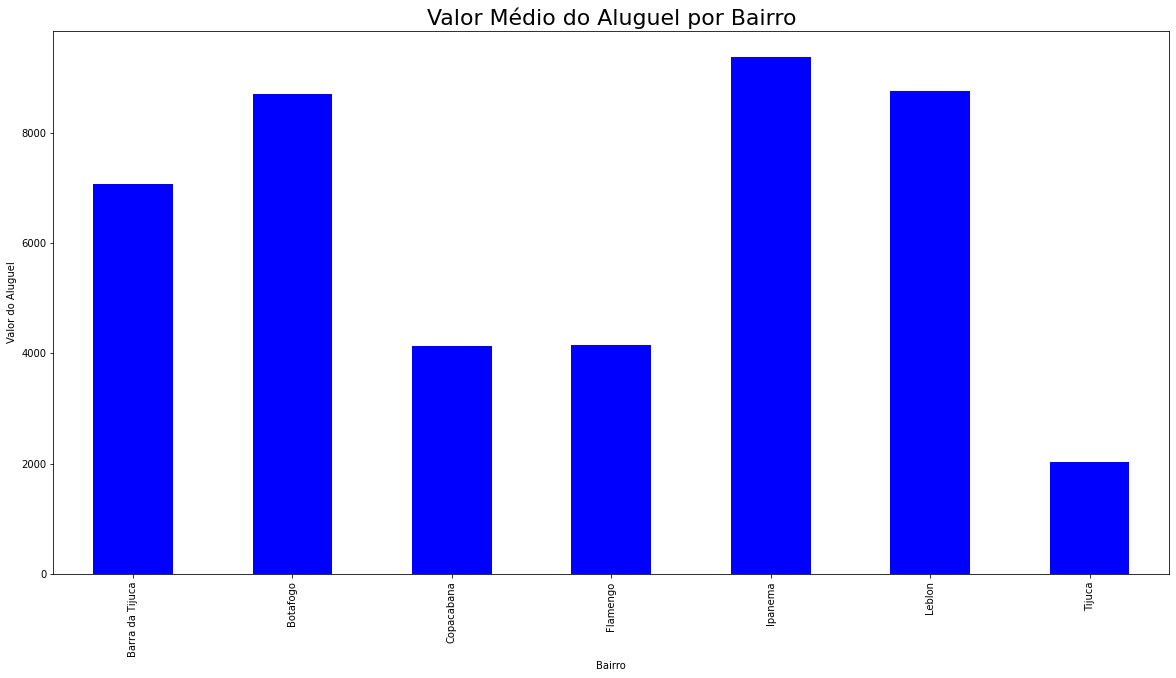

In [13]:
plt.rc('figure', figsize=(20,10))
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

# Criando Faixas de Valor

In [18]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14


O que queremos é gerar uma distribuição de frequência. Queremos contar a quantidade de imóveis que possuem de 1 a 2 quartos; depois 3 e 4 quartos; 5 e 6 e a faixa final de 7 ou mais quartos. 

Coletaremos essas classes e criaremos uma lista, em que passaremos os valores mínimos, máximos.

Em seguida, ultilizaremos o método ```cut()``` para nos ajudar a categorizar as classes. Ela receberá como parâmetro dados.Quartos e classes, o primeiro parâmetro corresponde à coluna do DataFrame.

In [19]:
# 1 - 2
# 3 - 4
# 5 - 6
# 7 - mais
classes = [0, 2, 4, 6, 100]
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
22566    (0.0, 2.0]
22567           NaN
22568    (2.0, 4.0]
22569    (0.0, 2.0]
22570    (0.0, 2.0]
Name: Quartos, Length: 22571, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

Agora, geraremos a primeira visualização da tabela de frequência.

In [20]:
pd.value_counts(quartos)

(0, 2]      11809
(2, 4]       9856
(4, 6]        689
(6, 100]       52
Name: Quartos, dtype: int64

In [22]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quarto = pd.cut(dados.Quartos, classes, labels = labels, include_lowest = True)
pd.value_counts(quarto)

1 e 2 quartos        11974
3 e 4 quartos         9856
5 e 6 quartos          689
7 quartos ou mais       52
Name: Quartos, dtype: int64

# Identificando e Removendo Outliers

In [23]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

Teremos uma representação gráfica que nos ajudará a compreender a técnica que usaremos nesta aula para remoção de outliers. Estamos utilziando Box-plot, que possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 parte os dados em 75% e 25%. A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers. 

<img src="./Box-Plot.png" height=500/>

<AxesSubplot:>

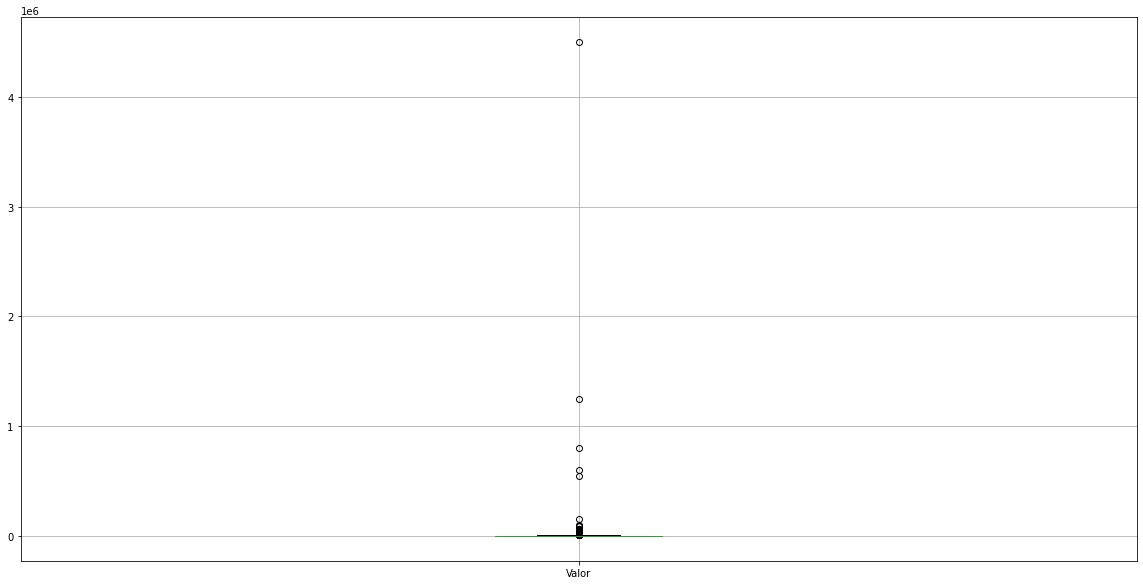

In [24]:
dados.boxplot(['Valor'])

In [25]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
7888,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.77,9247.69
11004,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800900.0,4907.98,4913.50
13090,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,551000.0,3666.67,3673.33
14316,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7485.03,7494.05
16047,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.00,15003.67


Geraremos algumas estatísticas a partir desses dados. Para facilitar a digitação, criaremos uma series que chamaremos de valor.

In [26]:
valor = dados['Valor']

Primeiro, calcularemos Q1 o primeiro quartil. 

Assim feito, prosseguiremos com o cálculo de Q3 e em seguida IIQ, o intervalo interquatílico. Precisamos, ainda, calcular os limites, que chamaremos de ```limite_inferior``` e ```limite_superior```.

In [27]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Faremos uma seleção dos dados que estão apenas dentro desses dois limites.

In [28]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

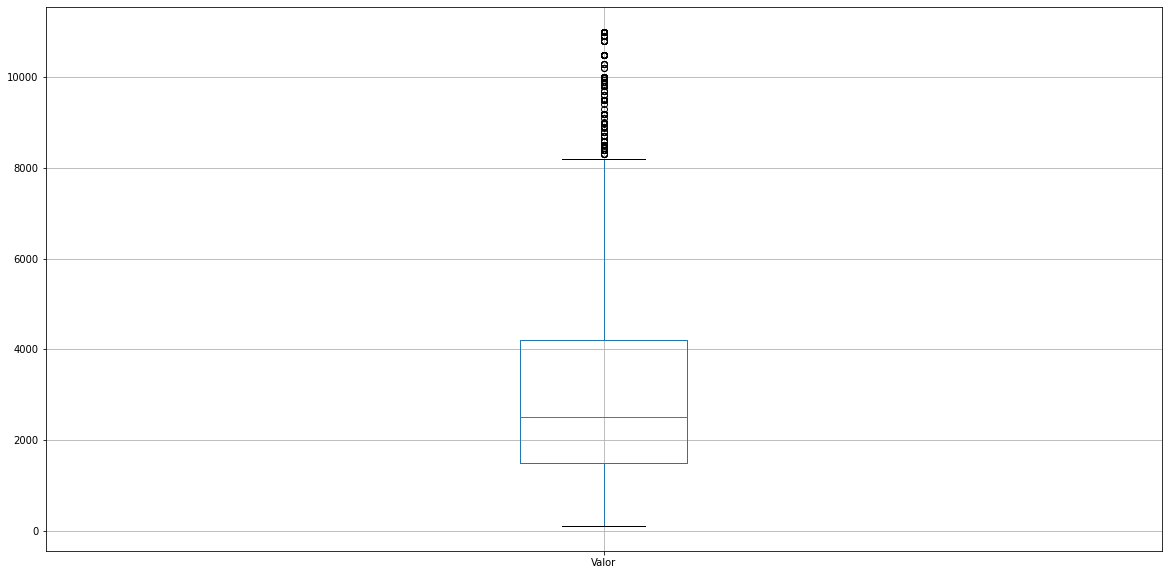

In [29]:
dados_new.boxplot(['Valor'])

O histograma é uma distribuição de frequências dos dados.

Para dados, teremos apenas uma barra, mas depois teremos uma distribuição de barras que nos permite algumas análises.

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

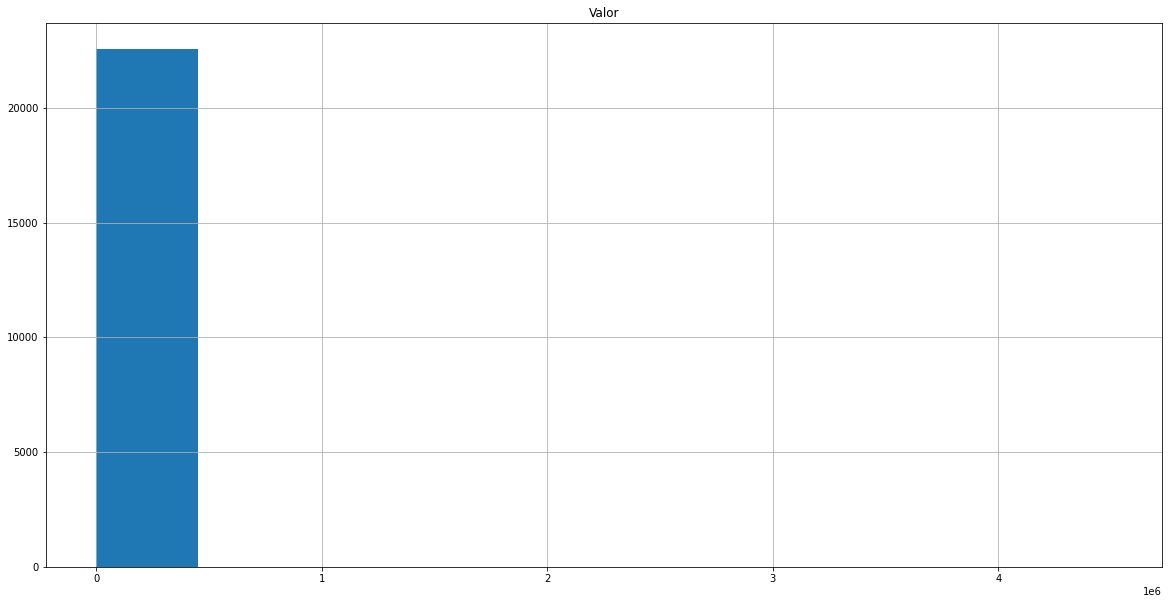

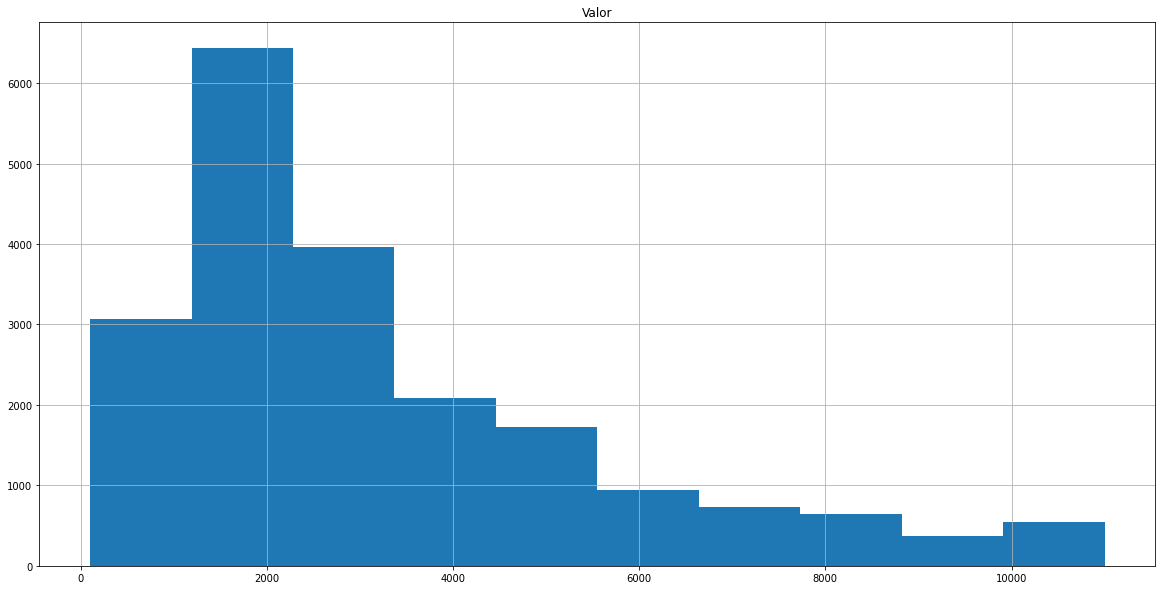

In [30]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Removendo Outliers Por Tipo

Primeiramente construiremos nosso box-plot e depois prosseguimos com a análise

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

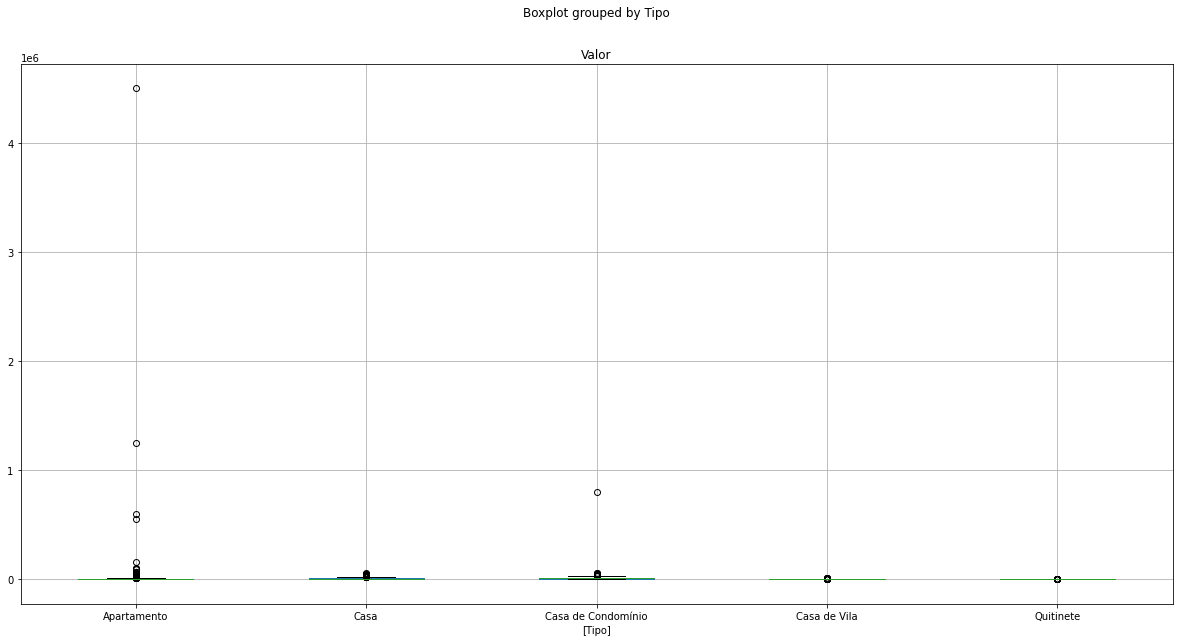

In [31]:
dados.boxplot(['Valor'], by = ['Tipo'])

Teremos um box-plot pautado por tipo de imóvel, tais como apartamento, casa, casa de vila e assim por diante. Podemos ter informações discrepantes para um tipo de imóvel que não estão em outro, e isso pode atrapalhar nossa análise caso todos os dados sejam analisados de maneira conjunta. Temos comportamentos diferentes em cada tipo de imóvel, como locações caras para condomínios de alto padrão que nunca se aplicariam a uma quitinete. 

Faremos a análise para os grupos que selecionamos. 

In [32]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

Assim feito, estamos prontos para criar as estatísticas, utilizando a metodologia que já conhecemos

In [35]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Ao visualizarmos Q1, por exemplo, teremos uma Series por tipo de imóvel. O mesmo vale para todos os elementos da fórmula, como Q3, limite superior e inferior

Para acessar o limite_superior de um tipo de imóvel do tipo apartamento basta

In [36]:
limite_superior['Apartamento']

10100.0

Criaremos uma seleção mais complexa, afim de identificarmos os dados discrepante de acordo com os tipos de imóvel.

Agora precisaremos realizar uma seleção, e em um caso que temos mais de um tipo de variável, Tipoe Valor

In [37]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
  #Selecionando apenas os dados do tipo atual
  eh_tipo = dados['Tipo'] == tipo
  #Selecionando apenas se os valores estão dentro dos limites
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  #Juntando as seleções
  selecao = eh_tipo & eh_dentro_limite
  #Filtrando os dados
  dados_selecao = dados[selecao]
  #Concatenando os DataFrames
  dados_new = pd.concat([dados_new, dados_selecao])

Após executarmos nosso código, podemos gerar um novo box-plot e comparar o antes e o depois

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

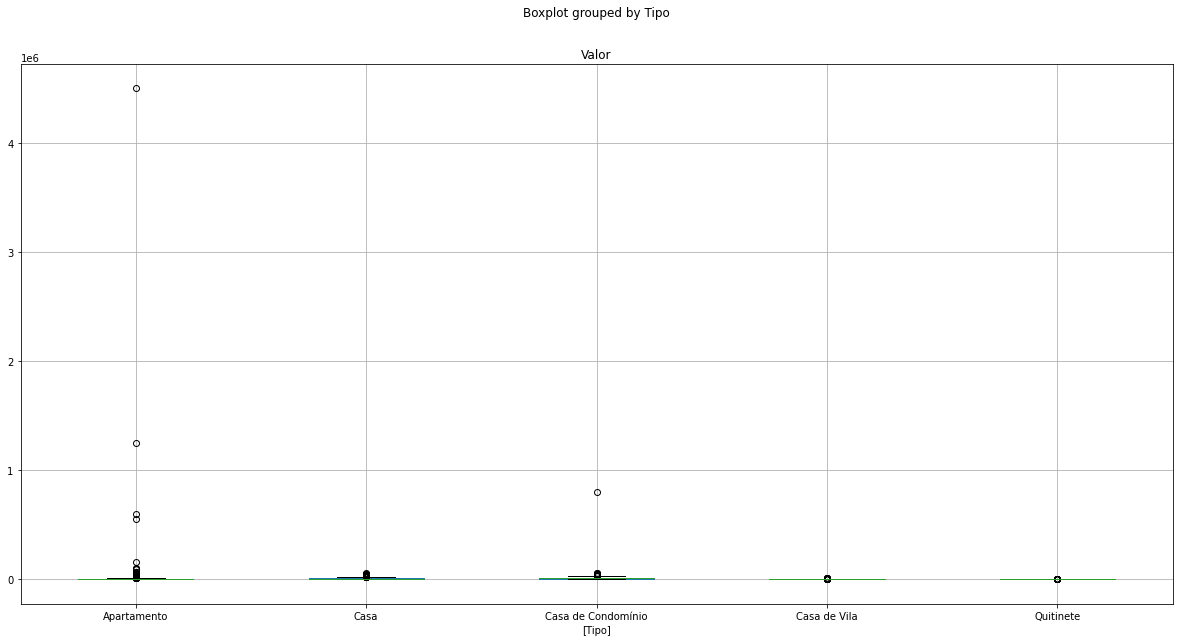

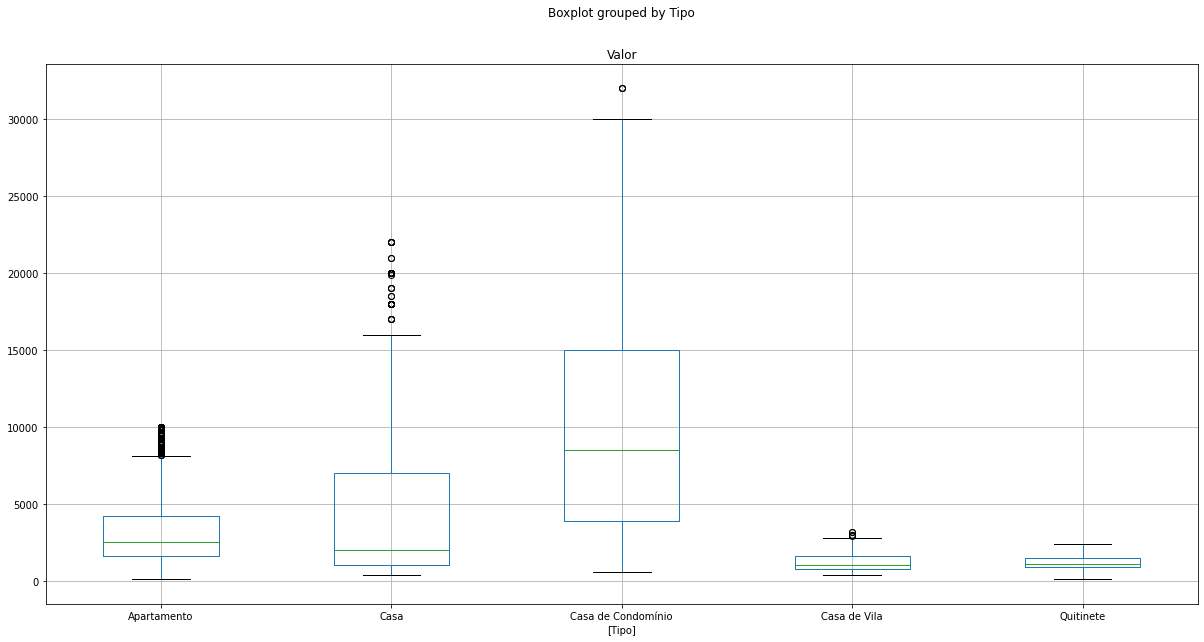

In [38]:
dados.boxplot(['Valor'], by=['Tipo'])
dados_new.boxplot(['Valor'], by=['Tipo'])

array([[<AxesSubplot:title={'center':'Apartamento'}>,
        <AxesSubplot:title={'center':'Casa'}>],
       [<AxesSubplot:title={'center':'Casa de Condomínio'}>,
        <AxesSubplot:title={'center':'Casa de Vila'}>],
       [<AxesSubplot:title={'center':'Quitinete'}>, <AxesSubplot:>]],
      dtype=object)

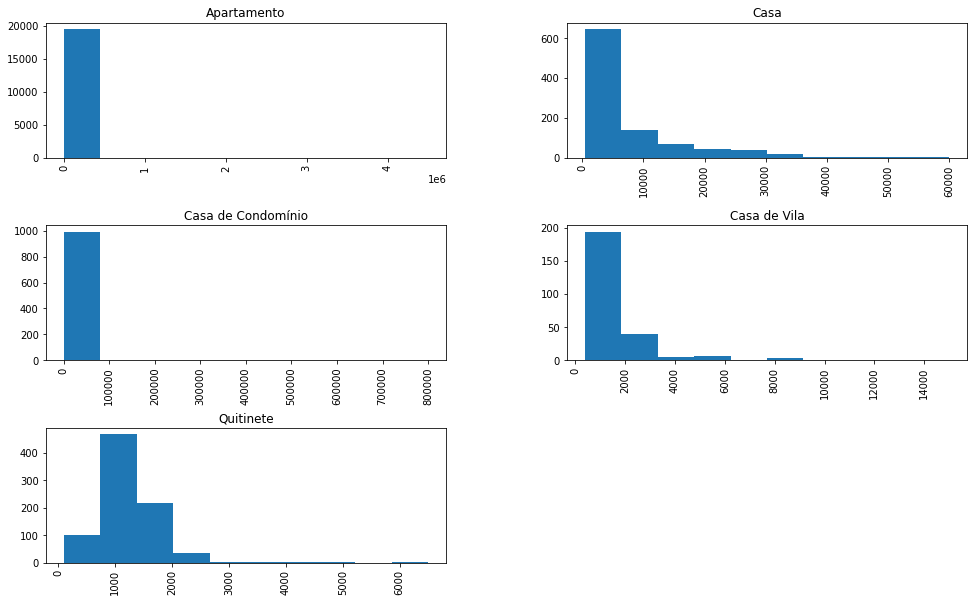

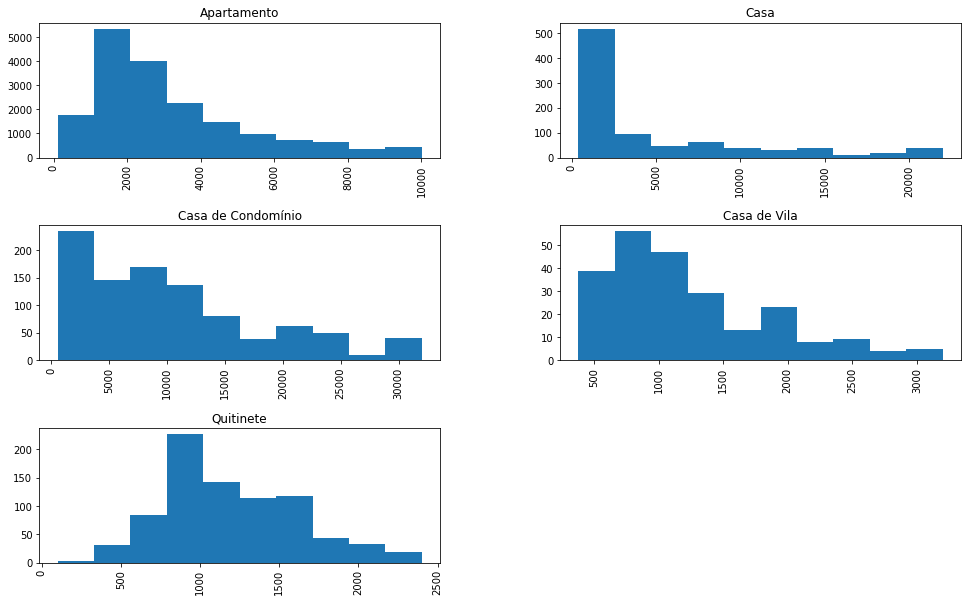

In [39]:
plt.rc('figure', figsize=(16,10))

dados.hist(['Valor'], by=['Tipo'])
dados_new.hist(['Valor'], by=['Tipo'])

In [40]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', index=False)

# Mais Graficos

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 8))

In [42]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Criaremos a área que sustentará o gráfico: 

Iremos inserir quatro gráficos dentro desse área, começaremos adicionando: 

Isso quer dizer que dentro dessa figura há um gráfico, duas linhas e duas colunas na posição 1. Faremos o mesmo procedimento para o resto dos gráficos.

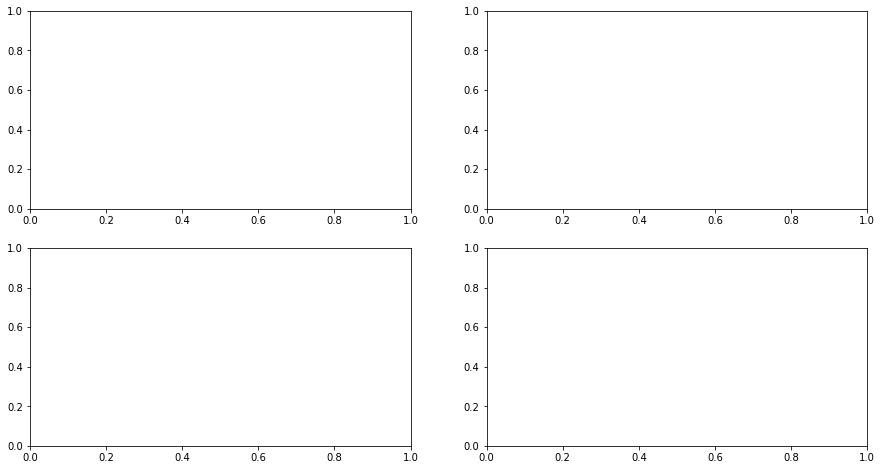

In [43]:
area = plt.figure()
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

Começaremos produzindo um scatterplot, isto é, um gráfico de dispersão. Usaremos duas variáveis: Valor e Area.

Criaremos o restante dos gráficos, e a cada um deles daremos um título diferente. No caso de ```g3```, faremos uma amostra aleatória dentro do próprio dataframe. Neste caso, como já sabemos, o índice estará todo errado e fora de orndem. Para que possamos produzir um gráfico interessante, devemos refazer o índice ao escrever ```dados_g3.index = range(dados_g3.shape[0])``` em nosso código

In [44]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

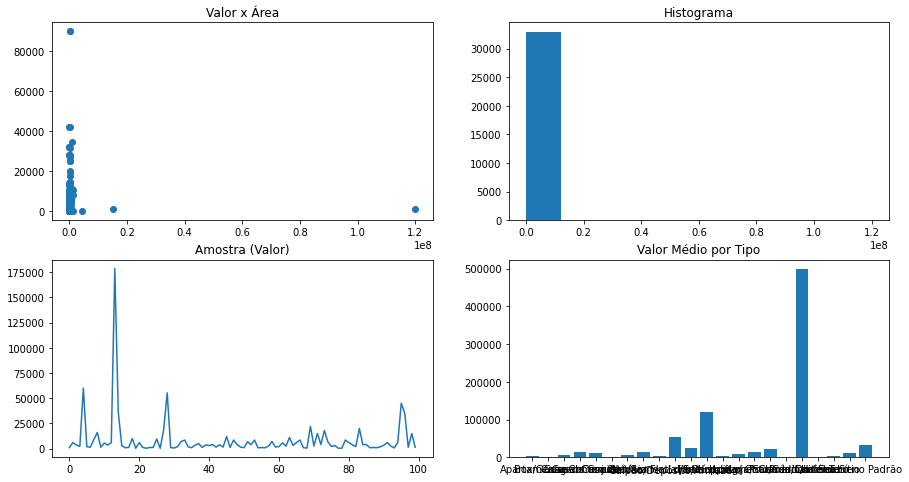

In [45]:
area

Nos resta salvar esses conteúdos, e para fazer isso escreveremos.

In [46]:
area.savefig('grafico.png', dpi=300, bbox_inches='tight')

Incluímos os argumentos dpi, que configura a resolução, e o bbox, que remove a borda branca da área do gráfico.